**Procesamiento de Señales**

*Identificación de una fruta en Buen estado y Mal Estado*

Gina Martinez López

In [40]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle

Se identifican los colores que pertenecen a la escala HSV de color y que identifican la parte dañada de una manzana.

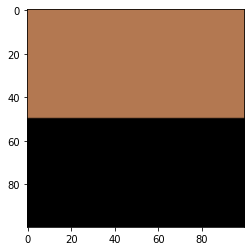

In [41]:
# Oxidacion Manzana
cafeb = np.array([0, 0, 0], np.uint8)
cafea = np.array([179, 120, 81], np.uint8)

imagen_color = np.zeros((100,100,3), dtype= np.uint8)
imagen_color[0:50,:,:]= cafea
imagen_color[50:100,:,:]= cafeb
plt.imshow(imagen_color)

Se lee la imagen y se deja en su color original con RGB

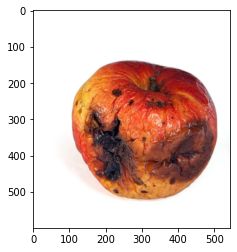

In [42]:
imagencita=cv2.imread('foto1.jpg')
imagencita = cv2.cvtColor(imagencita, cv2.COLOR_BGR2RGB )
plt.imshow(imagencita)

Se cambia el color de la imagen anterior con HSV

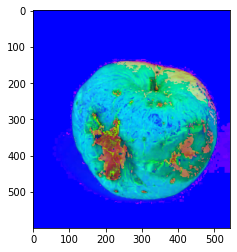

In [43]:
# Rango
hsvm=cv2.cvtColor(imagencita, cv2.COLOR_RGB2HSV )
plt.imshow(hsvm)

Se crea una mascara donde va a identificar las zonas de la manzana dañada de acuerdo a la imagen hsvm anteior y los colores definidos para la oxidación de la manzana tambien en HSV.

Ademas, para que tenga mejor exactitud se deja una dilatación de 10.

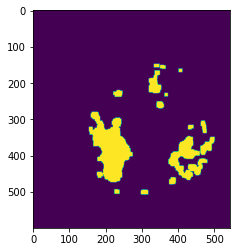

In [44]:

maskm = cv2.inRange(hsvm, cafeb, cafea)
maskm = cv2.dilate(maskm,np.ones((10, 10), np.uint8))
plt.imshow(maskm)

Por ultimo, se generan los contornos de la mascara, apartir de ahi para cada contorno se halla el area y si el area es mayor de 50 entonces lo va a señalar en un rectangulo rojo e imprime el estado de la manzana.

MANZANA EN MAL ESTADO
MANZANA EN MAL ESTADO
MANZANA EN MAL ESTADO
MANZANA EN MAL ESTADO
MANZANA EN MAL ESTADO
MANZANA EN MAL ESTADO
MANZANA EN MAL ESTADO
MANZANA EN MAL ESTADO
MANZANA EN MAL ESTADO
MANZANA EN MAL ESTADO
MANZANA EN MAL ESTADO
MANZANA EN MAL ESTADO
MANZANA EN MAL ESTADO
MANZANA EN MAL ESTADO
MANZANA EN MAL ESTADO


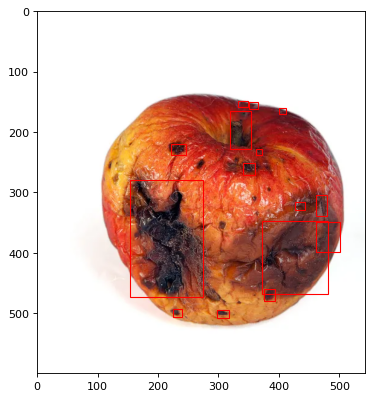

In [45]:
manzana_mala = False

# Contornos
contornosm, _ = cv2.findContours(maskm, cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)

# Ordenamos
contornosm = sorted(contornosm, key=lambda x: cv2.contourArea(x), reverse=True)

plt.figure(figsize=(8,6),dpi=80)
plt.imshow(imagencita)


for contm in contornosm:
    # Extraemos el area
    aream = cv2.contourArea(contm)

    if aream >= 50 :
        # Detectamos las zonas malas
        xsim, ysim, anchom, altom = cv2.boundingRect(contm)

        # Mostramos los errores
        plt.gca().add_patch(Rectangle((xsim,ysim),anchom,altom,linewidth=1,edgecolor='r',facecolor='none'))

        # Manzana Mala
        print("MANZANA EN MAL ESTADO")

        manzana_mala = True


if not manzana_mala :
    # Manzana buena
    plt.gca().add_patch(Rectangle((xsim,ysim),anchom,altom,linewidth=1,edgecolor='g',facecolor='none'))
    print("MANZANA EN BUEN ESTADO")
